<a href="https://www.kaggle.com/code/wandererfakeer/04-median-salaries-based-on-job-titles?scriptVersionId=191590057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
dataf = pd.read_csv("/kaggle/input/data-jobs-by-lukebarousse/data_jobs.csv")

dataf["job_posted_date"] = pd.to_datetime(dataf.job_posted_date)

dataf.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [4]:
dataf.dropna(subset = ["salary_year_avg"], inplace = True)

In [5]:
grouped = dataf.groupby("job_title_short")["salary_year_avg"].median().sort_values()

grouped

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Software Engineer             99150.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Data Engineer                125000.0
Data Scientist               127500.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Name: salary_year_avg, dtype: float64

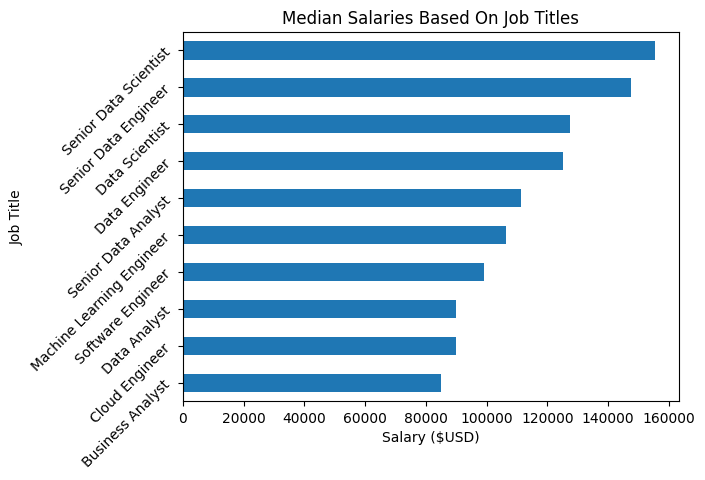

In [6]:
grouped.plot(kind = "barh")

plt.title("Median Salaries Based On Job Titles")

plt.xlabel("Salary ($USD)")

plt.yticks(rotation = 45, ha = "right")

plt.ylabel("Job Title")

plt.show()